# Visualizing NN Training

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import model
import dataset.iris_data as iris_data
import dataset.binary as binary

In [3]:
# Load iris dataset
train, test = iris_data.load_data()
num_train = train[0].shape[0]
train_x, train_y = train
test_x, test_y = test

In [ ]:
# Transform data to binary
transformer = binary.DataTransform(train_x, 3)
train_x = transformer.apply_transform(train_x)
test_x  = transformer.apply_transform(test_x)

train = [train_x, train_y]
test  = [test_x , test_y]

In [4]:
# Define learning problem
iris = model.LearningProblem(input_dim=4, num_classes=3, train=train, test=test, path="./tmp/")

In [ ]:
# Generate learning models            
#  [4 dim input] ==> [2 dim hidden] ==> [n dim hidden] ==> [3 dim output]
n_dim = [4]
for i in range(len(n_dim)):
    iris.load_model("bin_four_{}".format(i), hidden_dims=[2,i])

In [ ]:
loss_curves = dict()
names = ['bin_four_{}'.format(i) for i in range(len(n_dim))]
with model.Session(iris) as sess:
    for m in names:
        sess.set_current_model(m)
        loss_curves[m] = sess.quick_train(epochs=50000)

In [ ]:
# Plot loss curves
for m in names:
    plt.plot(loss_curves[m])
plt.legend(names)
plt.xlim((0,50000))
plt.ylim((0,1.5))
plt.title('Loss curves for bin')
plt.savefig('loss_curve_bin.png',dpi=200)
plt.show()

In [5]:
iris.load_model("weights_test_l2", hidden_dims=[6,4])

In [ ]:
with model.Session(iris) as sess:
    sess.set_current_model("binary_test")
    loss_curve, loss_curve_v = sess.quick_train(epochs=10000, validate=True)

In [ ]:
plt.plot(loss_curve['loss'])
plt.plot(loss_curve_v['loss_test'])
plt.legend(["Train","Test"])
plt.title('Training vs. Test Loss')
plt.savefig('binary_3.png',dpi=600)
plt.show()

In [7]:
with model.Session(iris) as sess:
    sess.set_current_model("weights_test_l2")
    loss_curve, loss_curve_v, weights_curve, biases_curve = sess.all_stats(epochs=500000, validate=True, verbose=True)

Initializing variables for weights_test_l2.
Current Epoch: 499999

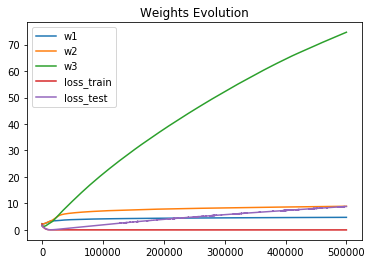

In [12]:
plt.plot(weights_curve)
plt.plot(loss_curve)
plt.plot(loss_curve_v)
plt.legend(['w1','w2','w3','loss_train','loss_test'])
plt.title('Weights Evolution')
plt.savefig('weights_evolution.png',dpi=600)
plt.show()

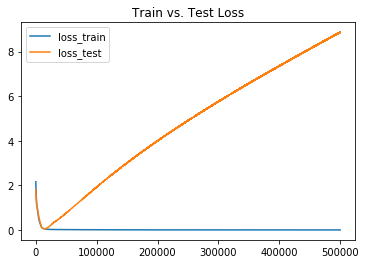

In [9]:
plt.plot(loss_curve)
plt.plot(loss_curve_v)
plt.legend(['loss_train','loss_test'])
plt.title('Train vs. Test Loss')
plt.savefig('loss.png',dpi=600)
plt.show()

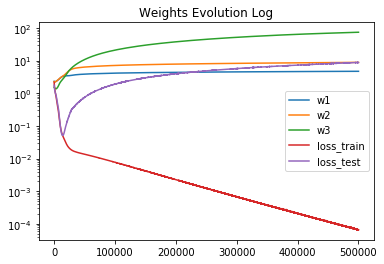

In [13]:
MIN = 0
MAX = 500000
plt.plot(weights_curve[MIN:MAX])
plt.plot(loss_curve[MIN:MAX])
plt.plot(loss_curve_v[MIN:MAX])
plt.yscale('log')
plt.legend(['w1','w2','w3','loss_train','loss_test'])
plt.title('Weights Evolution Log')
plt.savefig('weights_evolution_zoom.png',dpi=600)
plt.show()